FileChooser(path='C:\Users\jaspe\PycharmProjects\Lindel', filename='', show_hidden='False')

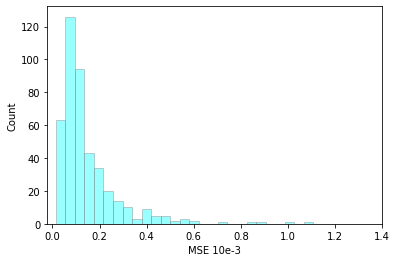

In [1]:
import IPython.display as ids
import matplotlib.pyplot as plt
import numpy as np

from scripts.logistic_model.notebook.file_chooser import FileChooser
from scripts.logistic_model.test_models import run_test_set

fc = FileChooser(
            title="Select the test set to run the trained models on:",
            select_desc="Choose test set",
            change_desc="Choose different file",
            file_ends_with='.txt'
        )

def on_file_chosen(*args):
    file = fc.selected
    file_dir = f'{fc.selected_path}/'
    errors = run_test_set(file, file_dir)

    x_range_label = np.arange(0, 1.6, .2)
    x_range_label_str = list(map(lambda x: str(round(x, 1)), x_range_label))
    x_range = (10 ** -3) * x_range_label

    fig, (ax) = plt.subplots(nrows=1)
    ax.hist(errors, bins=6 * len(x_range_label), color='aqua', alpha=.4, edgecolor='grey')
    ax.xaxis.set_ticks(x_range)
    ax.xaxis.set_ticklabels(x_range_label_str)
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlim(x_range[0] - x_range[1] / 9, x_range[-1])
    plt.xlabel("MSE 10e-3")
    plt.ylabel("Count")
    plt.show()

fc.register_callback(on_file_chosen)
ids.display(fc)